# Dataset Source

https://www.kaggle.com/fedesoriano/heart-failure-prediction


- Age: age of the patient [years]
<br><br>
- Sex: sex of the patient 
    - M: Male
    - F: Female
<br><br>
- ChestPainType: chest pain type 
    - TA: Typical Angina
    - ATA: Atypical Angina
    - NAP: Non-Anginal Pain
    - ASY: Asymptomatic<br>
<br>
- RestingBP: resting blood pressure [mm Hg]
<br><br>
- Cholesterol: serum cholesterol [mm/dl]
<br><br>
- FastingBS: fasting blood sugar 
    - 1: if FastingBS > 120 mg/dl 
    - 0: otherwise
<br><br>
- RestingECG: resting electrocardiogram results 
    - Normal: Normal
    - ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) 
    - LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria
<br><br>
- MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
<br><br>
- ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
<br><br>
- Oldpeak: oldpeak = ST [Numeric value measured in depression]
<br><br>
- ST_Slope: the slope of the peak exercise ST segment 
    - Up: upsloping, 
    - Flat: flat
    - Down: downsloping
<br><br>
- HeartDisease: output class [1: heart disease, 0: Normal]


# Import Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from jcopml.plot import plot_missing_value, plot_residual

# Load Dataset

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# Plot Missing Values

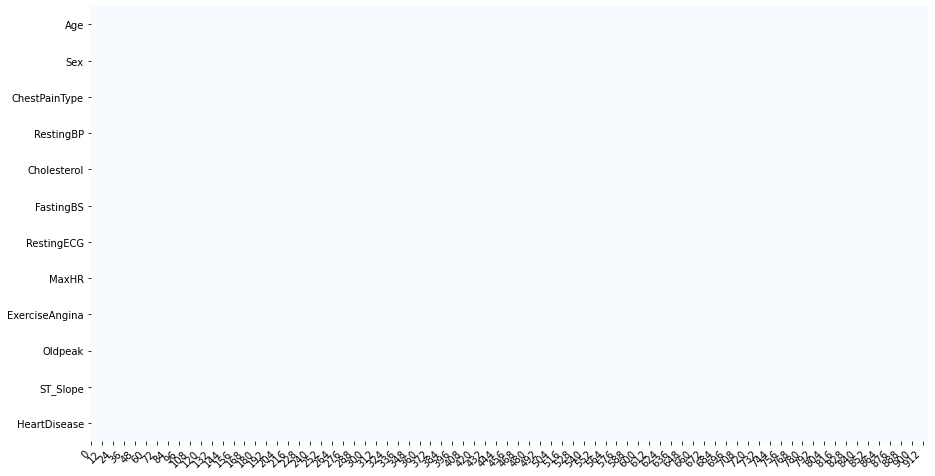

In [3]:
plot_missing_value(df)

# Splitting Dataset

In [8]:
from sklearn.model_selection import train_test_split

In [11]:
X = df.drop(columns="HeartDisease")
y = df.HeartDisease

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((734, 11), (184, 11), (734,), (184,))

# Make a model

In [22]:
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.tuning import random_search_params as rsp

## Random Forest

In [25]:
from sklearn.model_selection import RandomizedSearchCV

#### Without Polynomial

In [27]:
preprocessor = ColumnTransformer([
    ("numeric", num_pipe(scaling="standard"), ["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak"]),
    ("categoric", cat_pipe(encoder="onehot"), ["Sex", "ChestPainType", "FastingBS", "RestingECG", "ST_Slope"])
])

pipeline = Pipeline([
    ("prep", preprocessor),
    ("algo", RandomForestClassifier())
])

rf_model = RandomizedSearchCV(pipeline, rsp.rf_params, cv=3, n_jobs=-1, verbose=-1, n_iter=50)
rf_model.fit(X_train, y_train)
rf_model.best_estimator_

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   13.9s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   30.9s finished


Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'RestingBP',
                                                   'Cholesterol', 'MaxHR',
                                                   'Oldpeak']),
                                                 ('categoric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                

In [28]:
rf_model.score(X_train, y_train), model.score(X_test, y_test)

(0.8937329700272479, 0.8586956521739131)

### With Polynomial

In [29]:
preprocessor = ColumnTransformer([
    ("numeric", num_pipe(scaling="standard", poly=2), ["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak"]),
    ("categoric", cat_pipe(encoder="onehot"), ["Sex", "ChestPainType", "FastingBS", "RestingECG", "ST_Slope"])
])

pipeline = Pipeline([
    ("prep", preprocessor),
    ("algo", RandomForestClassifier())
])

rf_poly_model = RandomizedSearchCV(pipeline, rsp.rf_poly_params, cv=3, n_jobs=-1, verbose=-1, n_iter=50)
rf_poly_model.fit(X_train, y_train)
rf_poly_model.best_estimator_

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   16.5s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   38.6s finished


Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('poly',
                                                                   PolynomialFeatures(degree=1,
                                                                                      interaction_only=True)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'RestingBP',
                                                   'Cholesterol', 'MaxHR',
                                                   'Oldpeak']),
                                                 ('categoric',
              

In [30]:
rf_poly_model.score(X_train, y_train), model.score(X_test, y_test)

(0.9209809264305178, 0.8586956521739131)